In [1]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Live Demo Regression Models

In [31]:
# Data genenrating - linear function
num_points = 500
x = np.linspace(-3, 3, num_points)
y = 2 * x + 3

#Create noise - loc = 0 is the average value of the noise
y_noise = np.random.normal(loc = 0, scale = 1, size = num_points)
y += y_noise

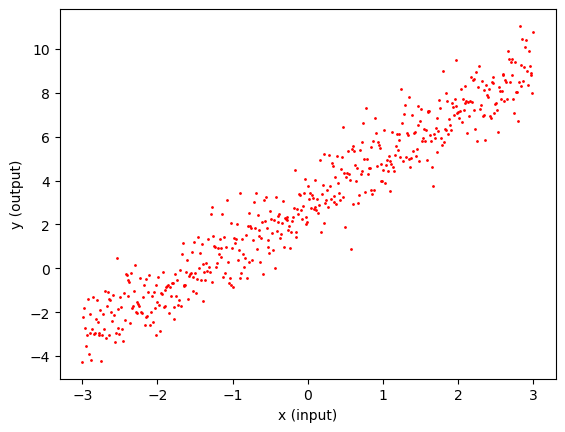

In [32]:
plt.scatter(x, y, c = 'r', s = 1)
plt.xlabel('x (input)')
plt.ylabel('y (output)')

plt.show()

In [33]:
# Create data frame
data = pd.DataFrame({'x': x, 'y':y})

In [34]:
data = data.sample(len(data))
data.to_csv('data_csv', index = None)

In [35]:
pd.read_csv('data_csv')

,x,y
0,0.426854,3.126783
1,2.531062,6.228719
2,0.066132,3.201748
3,0.919840,4.676088
4,-1.460922,1.420274
...,...,...
495,0.294589,3.755453
496,2.603206,8.834101
497,-0.751503,1.837753
498,-2.963928,-2.718231


In [38]:
# Start with assumption
# y = a * x + b
x = data.x.values
y = data.y.values

In [60]:
# Mean square error
def mse(y, y_model):
    return ((y - y_model) ** 2).mean()

In [67]:
def plot_model(x, y, a, b):
    y_model = a * x + b
    model_mse = mse(y, y_model)
    plt.scatter(x, y)
    plt.plot(x, y_model, c = 'r', label = f' y = {a}x + {b}; mse: {model_mse:.2f}')
    
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y model')
    plt.show()

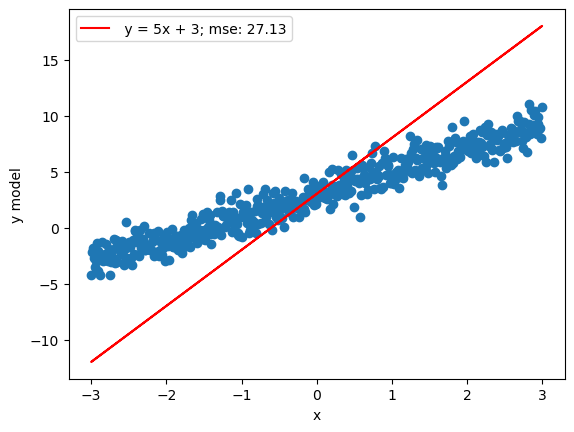

In [68]:
plot_model(x, y, 5, 3)

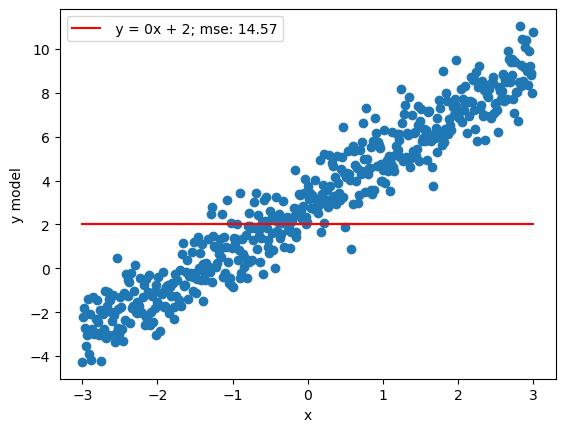

In [69]:
plot_model(x, y, 0, 2)

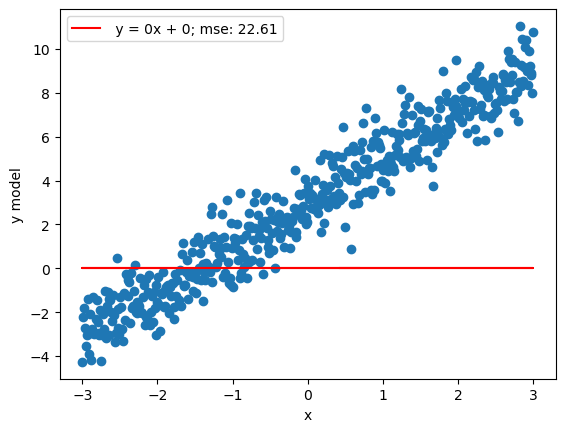

In [70]:
plot_model(x, y, 0, 0)

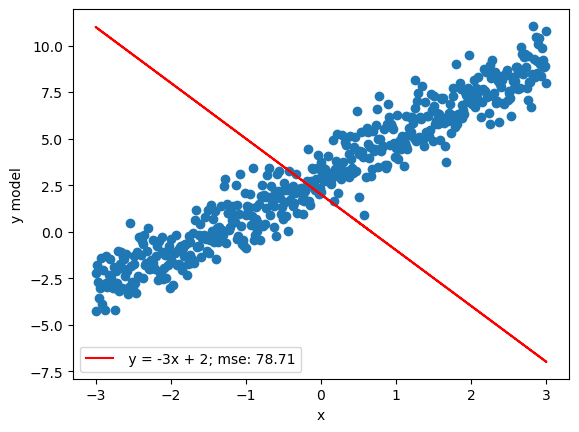

In [72]:
plot_model(x, y, -3, 2)

In [73]:
n_trials = 100
random_a = np.random.uniform(-5, 5, n_trials)
random_b = np.random.uniform(-5, 5, n_trials)

In [82]:
# Estimate the original func
min_mse, best_a, best_b = 1e50, 0,0 
for a in random_a:
    for b in random_b:
        y_model = a * x + b
        curr_mse = mse(y, y_model)
        if curr_mse < min_mse:
            best_a, best_b = a, b
            min_mse = curr_mse
        
print(best_a, best_b, min_mse)

2.3044591840610735 2.991751326365809 1.0966646932699022


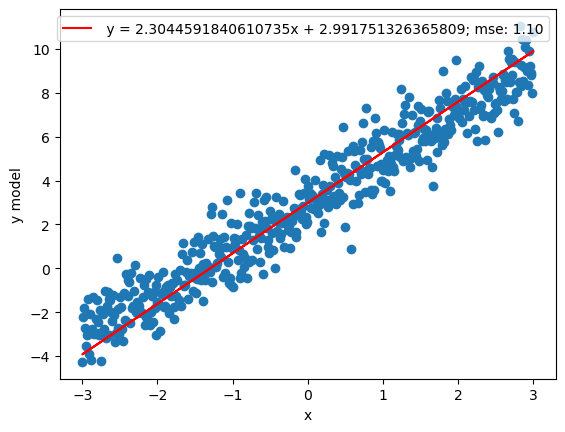

In [83]:
plot_model(x, y, best_a, best_b)

In [116]:
a, b = 5, 18
alpha = 0.01

a_gradient = -2 / len(x) * np.sum(x * (y - (a * x + b)))
b_gradient = -2 / len(y) * np.sum(y - (a * x + b))

In [117]:
y_tilde = a * x + b
mse(y, y_tilde)

251.81151108911294

In [118]:
[a_gradient, b_gradient]

[17.77524120100632, 29.979092374190902]

In [119]:
new_a = a - alpha * a_gradient
new_b = b - alpha * b_gradient

In [120]:
y_tilde = new_a * x + new_b
mse(y, y_tilde)

239.84950156451634

In [121]:
new_a = new_a - alpha * a_gradient
new_b = new_b - alpha *  b_gradient
y_tilde = new_a * x + new_b
mse(y, y_tilde)

228.257576577411

In [122]:
new_a = new_a - alpha * a_gradient
new_b = new_b - alpha *  b_gradient
y_tilde = new_a * x + new_b
mse(y, y_tilde)

217.03573612779692

In [123]:
for i in range(10):
    new_a = new_a - alpha * a_gradient
    new_b = new_b - alpha *  b_gradient
    y_tilde = new_a * x + new_b
    print(mse(y, y_tilde))

206.18398021567418
195.70230884104268
185.59072200390247
175.84921970425356
166.47780194209594
157.47646871742955
148.84522003025452
140.58405588057073
132.6929762683782
125.17198119367697


In [ ]:
def perform_gradient_descent(x, y, a, b, learning_rate):
    a_gradient = -2 / len(x) * np.sum(x * (y - (a * x + b)))
    b_gradient = -2 / len(y) * np.sum(y - (a * x + b))
    new_a = new_a - alpha * a_gradient
    new_b = new_b - alpha *  b_gradient
    y_tilde = new_a * x + new_b